In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalMaxPool2D

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
data=pd.read_csv("data_phenotypic.csv")
data.head()

,Unnamed: 0,DX_GROUP,DSM_IV_TR,subject,AGE_AT_SCAN,SEX,FIQ,EYE_STATUS_AT_SCAN,anat_cnr,anat_efc,...,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,qc_rater_1,qc_anat_rater_2,qc_func_rater_2,qc_func_rater_3,qc_anat_rater_3
0,0,1,1,50002,16.77,1,103.0,2,10.201539,1.194664,...,0.011443,0.116828,8.0,3.980100,0.054346,1,0,1,1,0
1,1,1,1,50003,24.45,1,124.0,2,7.165701,1.126752,...,0.031781,0.322092,135.0,67.164179,0.041862,0,0,0,0,0
2,2,1,1,50004,19.09,1,113.0,2,7.698144,1.226218,...,0.014260,0.127745,29.0,14.427861,0.046745,0,0,0,0,0
3,3,1,1,50005,13.73,2,119.0,2,9.071807,1.256278,...,0.019205,0.128136,22.0,10.945274,0.027963,0,0,2,0,0
4,4,1,1,50006,13.37,1,109.0,2,8.026798,1.407166,...,0.006919,0.070143,3.0,1.492537,0.054006,0,0,2,0,0


In [4]:
data.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
data1=pd.read_csv(r'resnet25.csv')

In [6]:
data1.shape

(1100, 26)

In [7]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm


In [9]:
models = {
    # "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

list(models.keys())

['Decision Tree',
 'Random Forest Classifier',
 'XGBClassifier',
 'CatBoosting Classifier',
 'AdaBoost Classifier']

In [11]:
data['DX_GROUP']=data['DX_GROUP'].replace(2,0)
X= data1
y=data['DX_GROUP']

In [12]:
X


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,path
0,0.000336,0.003042,4.730000e-08,0.995197,1.640000e-17,1.830000e-08,0.000002,5.820000e-09,1.310000e-05,7.710000e-14,...,6.770000e-14,1.030000e-11,6.470000e-06,9.370000e-08,4.170000e-13,0.001350,1.850000e-07,3.130000e-09,0.000014,50002
1,0.001363,0.003898,2.890000e-06,0.979094,5.470000e-15,3.310000e-08,0.001102,7.220000e-09,2.348580e-04,6.860000e-14,...,1.510000e-11,2.020000e-08,3.660000e-05,3.990000e-06,1.820000e-13,0.000947,3.120000e-05,3.270000e-10,0.000434,50003
2,0.001841,0.000301,1.860000e-06,0.996361,4.750000e-15,7.520000e-07,0.000048,8.470000e-08,5.010880e-04,9.210000e-15,...,4.310000e-12,3.180000e-08,9.290000e-07,8.310000e-06,1.030000e-11,0.000613,2.480000e-06,4.460000e-10,0.000182,50004
3,0.005576,0.001323,1.210000e-06,0.607990,1.910000e-13,1.763322e-03,0.001972,1.050000e-07,9.361550e-04,5.900000e-13,...,3.050000e-08,2.340000e-06,2.810000e-05,1.245300e-04,3.500000e-10,0.109905,2.426058e-03,4.240000e-07,0.196317,50005
4,0.004059,0.019328,1.780000e-05,0.203612,2.590000e-09,1.350000e-05,0.000477,1.380000e-05,4.076140e-04,9.890000e-11,...,5.920000e-07,6.710000e-05,5.661060e-04,1.270570e-03,2.520000e-08,0.617407,2.805540e-04,3.620000e-07,0.150112,50006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.028031,0.000696,3.630000e-05,0.005135,3.500000e-16,2.020000e-07,0.380174,3.240000e-07,2.000000e-07,1.220000e-12,...,8.000000e-10,2.190000e-09,5.449142e-02,2.103840e-04,4.400000e-10,0.136531,1.000000e-07,3.430000e-12,0.015326,51583
1096,0.001103,0.000071,8.220000e-06,0.110088,1.700000e-13,3.350000e-08,0.027835,5.590000e-08,2.490000e-06,3.040000e-12,...,2.800000e-09,1.680000e-08,1.247300e-04,3.320000e-05,1.920000e-08,0.004578,5.450000e-07,1.160000e-10,0.000387,51584
1097,0.014032,0.000189,1.727230e-04,0.055635,7.980000e-16,2.440000e-06,0.035064,2.100000e-08,1.040410e-04,2.020000e-13,...,2.040000e-09,2.350000e-07,8.545787e-03,6.620000e-05,2.080000e-08,0.124686,1.530000e-05,2.180000e-10,0.017230,51585
1098,0.061313,0.001360,7.210000e-07,0.886795,3.520000e-14,1.290000e-11,0.000120,3.120000e-10,1.380000e-07,2.560000e-16,...,7.170000e-13,1.300000e-10,5.422438e-03,5.790000e-05,4.790000e-15,0.000011,5.060000e-07,3.860000e-11,0.039766,51606


Training set has 880 samples.
Testing set has 220 samples.
Decision Tree
Model performance for Training set
-accuracy: 1.0000
- Precision 1.0000
- Recall: 1.0000
- F1_Score 1.0000
- Confusion Matrix
  [[456   0]
 [  0 424]]
----------------------------------
Model performance for Testing set
-accuracy: 0.8273
- Precision 0.7881
- Recall: 0.8774
- F1_Score 0.8304
- Confusion Matrix
 [[89 25]
 [13 93]]


Random Forest Classifier
Model performance for Training set
-accuracy: 1.0000
- Precision 1.0000
- Recall: 1.0000
- F1_Score 1.0000
- Confusion Matrix
  [[456   0]
 [  0 424]]
----------------------------------
Model performance for Testing set
-accuracy: 0.7273
- Precision 0.7300
- Recall: 0.6887
- F1_Score 0.7087
- Confusion Matrix
 [[87 27]
 [33 73]]


XGBClassifier
Model performance for Training set
-accuracy: 1.0000
- Precision 1.0000
- Recall: 1.0000
- F1_Score 1.0000
- Confusion Matrix
  [[456   0]
 [  0 424]]
----------------------------------
Model performance for Testing set
-a

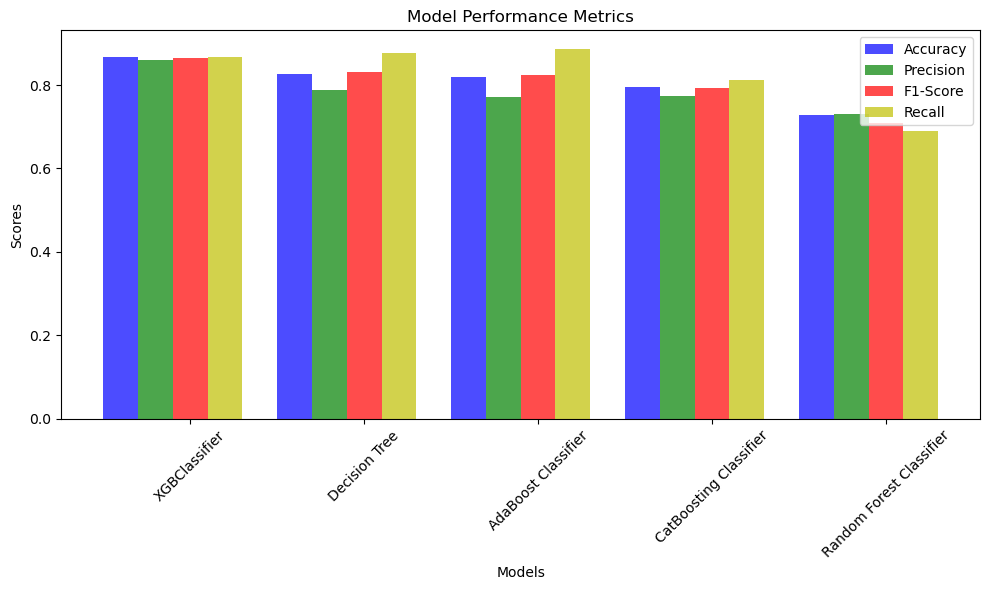

,Model Name,Accuracy,Precision,F1-Score,Recall
2,XGBClassifier,0.868182,0.859813,0.863850,0.867925
0,Decision Tree,0.827273,0.788136,0.830357,0.877358
4,AdaBoost Classifier,0.818182,0.770492,0.824561,0.886792
3,CatBoosting Classifier,0.795455,0.774775,0.792627,0.811321
1,Random Forest Classifier,0.727273,0.730000,0.708738,0.688679


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100,stratify=y)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

y_train.shape

model_list = []
acc_list =[]
prec_list=[]
recall_list=[]
f1_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy, train_precision, train_recall, train_f1, train_confusion=evaluate_model(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_confusion=evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("-accuracy: {:.4f}".format(train_accuracy))
    print("- Precision {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- F1_Score {:.4f}".format(train_f1))
    print("- Confusion Matrix\n ",train_confusion)

    print('----------------------------------')
    
    print('Model performance for Testing set')
    print("-accuracy: {:.4f}".format(test_accuracy))
    print("- Precision {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- F1_Score {:.4f}".format(test_f1))
    print("- Confusion Matrix\n",test_confusion)
    acc_list.append(test_accuracy)
    prec_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)
    print('='*35)
    print('\n')
    
results_cnn=pd.DataFrame(list(zip(model_list, acc_list,prec_list,f1_list,recall_list)), columns=['Model Name', 'Accuracy','Precision','F1-Score','Recall']).sort_values(by=["Accuracy"],ascending=False)
results_cnn 
df = results_cnn

# Set the width of the bars
bar_width = 0.2
model_names=df['Model Name']
# Set the positions of the bars on the x-axis
index = np.arange(len(model_names))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
plt.bar(index - bar_width, df['Accuracy'], bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index, df['Precision'], bar_width, label='Precision', color='g', alpha=0.7)
plt.bar(index + bar_width, df['F1-Score'], bar_width, label='F1-Score', color='r', alpha=0.7)
plt.bar(index + 2 * bar_width, df['Recall'], bar_width, label='Recall', color='y', alpha=0.7)

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
# plt.savefig(r'C:\Users\chand\Desktop\Projects\Feature_Extraction\results.png')
plt.show()
df

In [12]:
df.to_csv('resultssmri.csv')

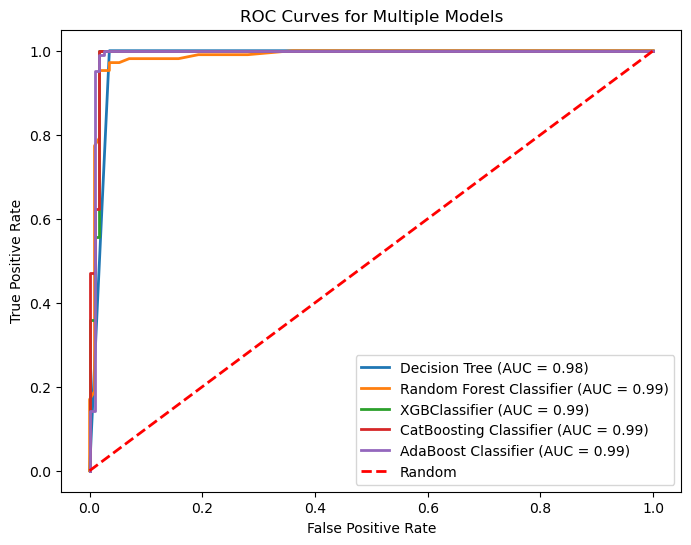

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Your previous code for model evaluation...

# Now, after evaluating models, let's generate and plot ROC curves for each model
plt.figure(figsize=(8, 6))

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train, y_train) # Train model
    
    # Predict probabilities for test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each model
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()


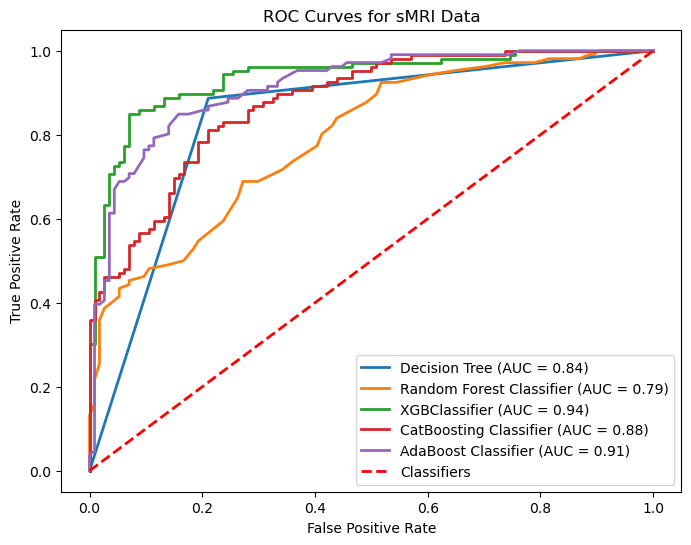

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Your previous code for model evaluation...

# Now, after evaluating models, let's generate and plot ROC curves for each model
plt.figure(figsize=(8, 6))

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train, y_train) # Train model
    
    # Predict probabilities for test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each model
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for sMRI Data')
plt.legend(loc='lower right')

# Save the plot as an image file (e.g., PNG, JPG, PDF)
plt.savefig('roc_curve_sMRI.png', dpi=500, bbox_inches='tight')  # Change the file format if needed

# Display the plot
plt.show()
